<a href="https://colab.research.google.com/github/akashAD98/EDA-NYC2019-Airbnb_booking_analysis/blob/main/Airbnb_Bookings_Analysis_2019_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [3]:
df=pd.read_csv('Airbnb NYC 2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
len(df)

48895

In [7]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## q)What can we learn about different hosts and areas?



In [9]:
df['host_name'].value_counts().head()

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Name: host_name, dtype: int64

In [10]:
#print(df.loc[df['host_name'] == 'Michael'])

In [11]:
x=df.iloc[np.where(df['host_name']=='Michael')].head()
x

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
151,36121,Lg Rm in Historic Prospect Heights,62165,Michael,Brooklyn,Prospect Heights,40.67386,-73.96641,Private room,85,15,9,2013-05-10,0.09,1,339
412,138216,Sunny and Spacious Designer's Home,674970,Michael,Brooklyn,Greenpoint,40.72212,-73.94254,Entire home/apt,141,5,8,2018-07-08,0.21,1,9
519,189135,Hell's Kitchen Funky 80's Hideaway!,179020,Michael,Manhattan,Hell's Kitchen,40.76311,-73.99388,Private room,99,1,89,2019-07-01,1.00,1,353
616,233189,NYC Studio in Heart of Times Square,1220414,Michael,Manhattan,Hell's Kitchen,40.76166,-73.99675,Entire home/apt,179,30,83,2019-05-31,0.88,1,292
811,289037,"2BR in Cobble Hill, Brooklyn, NY",632334,Michael,Brooklyn,Carroll Gardens,40.68353,-73.99140,Entire home/apt,189,2,13,2016-09-05,0.18,1,0


In [12]:


#df.iloc[np.where(df['']=='not_converted')].head(20)
x=df.iloc[np.where(df['neighbourhood_group']=='Manhattan')]
x

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [13]:
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [14]:
#there are 4 neighbourhood locations

In [15]:
from collections import Counter
# using Counter to analyze frequency of each listing based on neighborhood
nh = Counter(df['neighbourhood_group'])
nh

Counter({'Bronx': 1091,
         'Brooklyn': 20104,
         'Manhattan': 21661,
         'Queens': 5666,
         'Staten Island': 373})

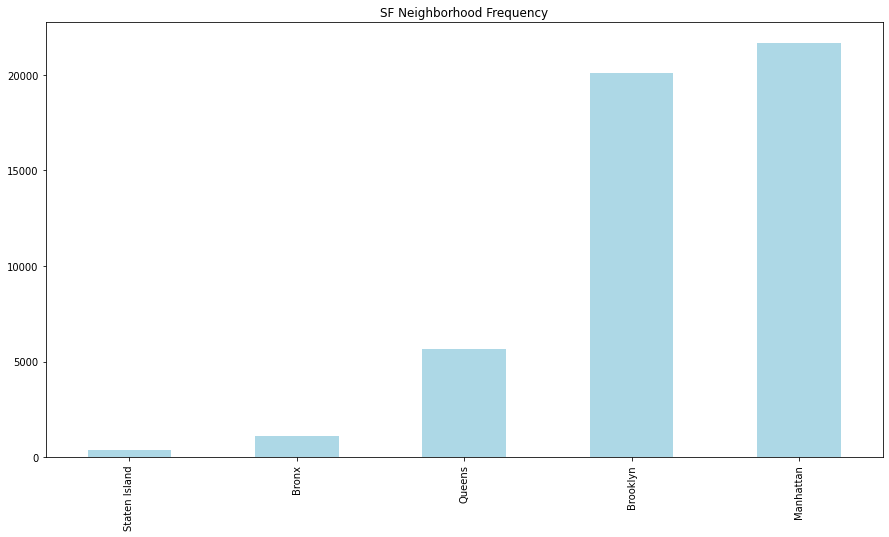

In [16]:

nh_df = pd.DataFrame.from_dict(nh, orient='index').sort_values(by=0)
nh_df.plot(kind='bar', 
           color = 'LightBlue', 
           figsize =(15,8), 
           title = 'SF Neighborhood Frequency', 
           legend = False)

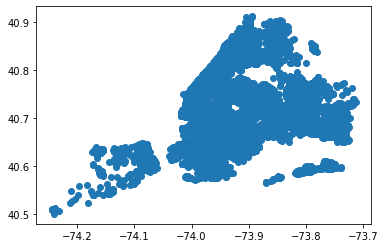

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x=df['longitude'], y=df['latitude'])
plt.show()

In [18]:
#avg price
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

## Let's see what the average prices are for each neighborhood

In [19]:

neighborhood_names = list(nh.keys())

# 2 column table of neighborhood names and prices
nh_prices = df[['neighbourhood_group', 'price']]
nh_prices.columns = ['neighbourhood', 'price']

# we pick out the rows which have neighborhood names with 400+ listings.
nh_prices = nh_prices[nh_prices['neighbourhood'].isin(neighborhood_names)]

# group by neighbourhood and then aggreate the prices based on mean
nh_prices_group = nh_prices.groupby('neighbourhood')
nh_prices = nh_prices_group['price'].agg(np.mean)

# turn dictionary's keys and values into a table for easy read
nh_prices = nh_prices.reset_index()
nh_prices['number of listings'] = nh.values()

nh_prices

,neighbourhood,price,number of listings
0,Bronx,87.496792,20104
1,Brooklyn,124.383207,21661
2,Manhattan,196.875814,5666
3,Queens,99.517649,373
4,Staten Island,114.812332,1091


In [20]:
df_neighbourhood_group = df['neighbourhood_group'].value_counts()
df_neighbourhood_group = pd.DataFrame({'Neighbourhood': df_neighbourhood_group.index,'Count': df_neighbourhood_group.values})
df_neighbourhood_group

,Neighbourhood,Count
0,Manhattan,21661
1,Brooklyn,20104
2,Queens,5666
3,Bronx,1091
4,Staten Island,373


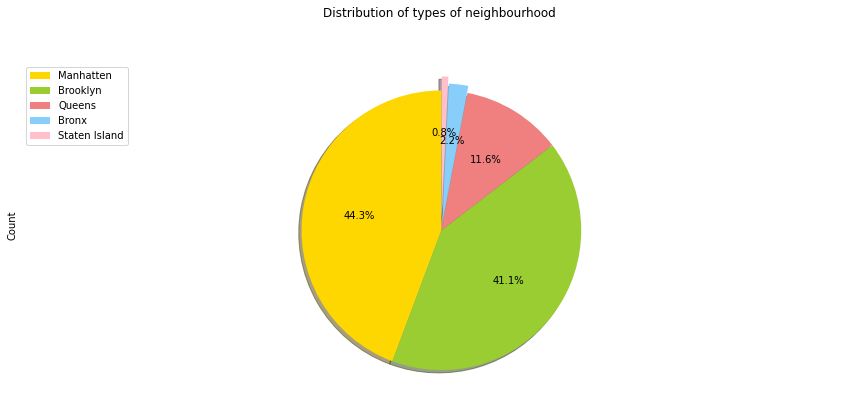

In [21]:
df_neighbourhood_group['Count'].plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=None,
                               colors=['gold','yellowgreen','lightcoral','lightskyblue','pink'],
                               explode=[0,0,0,0.05,0.1]
                              )

plt.title('Distribution of types of neighbourhood',y=1.12)
plt.axis('equal')
plt.legend(labels=['Manhatten','Brooklyn','Queens','Bronx','Staten Island'],loc='upper left')
plt.show()

In [22]:
df_neighbourhood_group_price = df.groupby(['neighbourhood_group']).mean()
df_neighbourhood_group_price = df_neighbourhood_group_price['price']
df_neighbourhood_group_price = pd.DataFrame({'Neighbourhood': df_neighbourhood_group_price.index,'Price': df_neighbourhood_group_price.values})
df_neighbourhood_group_price.set_index('Neighbourhood')

,Price
Neighbourhood,
Bronx,87.496792
Brooklyn,124.383207
Manhattan,196.875814
Queens,99.517649
Staten Island,114.812332


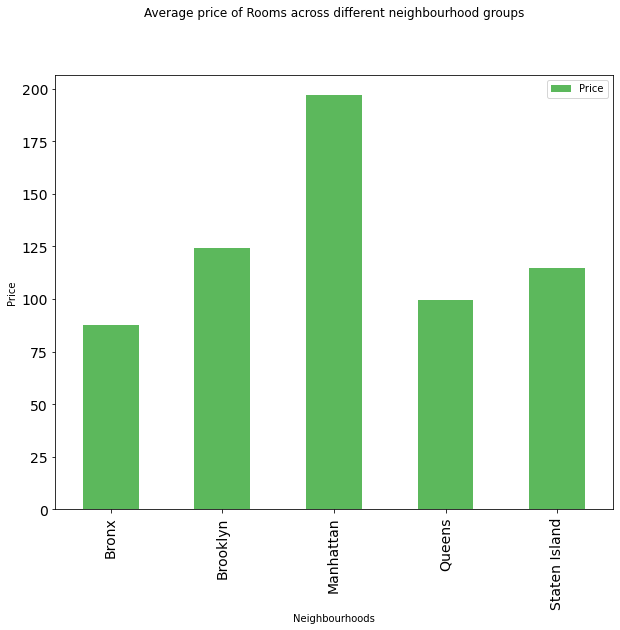

In [23]:
df_neighbourhood_group_price.plot(kind='bar',
                                 figsize=(10,8),
                                 width=0.5, 
                                 fontsize=14,     
                                 color = ['#5cb85c'])

plt.title('Average price of Rooms across different neighbourhood groups',y=1.12)
plt.xticks(df_neighbourhood_group_price.index,df_neighbourhood_group_price.Neighbourhood)
plt.xlabel('Neighbourhoods')
plt.ylabel('Price')
plt.show()

In [24]:
df['host_name'].value_counts()

Michael            417
David              403
Sonder (NYC)       327
John               294
Alex               279
                  ... 
Kange                1
Taeler               1
Sabina Giovanna      1
Tysha                1
Junho                1
Name: host_name, Length: 11452, dtype: int64

In [25]:
df['host_name'].value_counts().max()

417

In [26]:
df['host_name'].value_counts().min()

1

In [30]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [31]:
df['commons']=df['neighbourhood_group'] +'_'+ df['host_name']

In [32]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,commons
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,Brooklyn_John
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Manhattan_Jennifer
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,Manhattan_Elisabeth
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,Brooklyn_LisaRoxanne
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,Manhattan_Laura


## comparision of neighbourhood_gropu='manhattan' & host_name='michael'

In [33]:
x1=df.iloc[np.where(df['commons']=='Manhattan_Michael')]
x1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,commons
519,189135,Hell's Kitchen Funky 80's Hideaway!,179020,Michael,Manhattan,Hell's Kitchen,40.76311,-73.99388,Private room,99,1,89,2019-07-01,1.00,1,353,Manhattan_Michael
616,233189,NYC Studio in Heart of Times Square,1220414,Michael,Manhattan,Hell's Kitchen,40.76166,-73.99675,Entire home/apt,179,30,83,2019-05-31,0.88,1,292,Manhattan_Michael
880,318021,Room in Huge 1200sf W Harlem Suite,1632149,Michael,Manhattan,Harlem,40.80343,-73.95310,Private room,110,3,47,2019-06-30,0.57,1,248,Manhattan_Michael
988,398281,One Block From Central Park!,325790,Michael,Manhattan,Upper East Side,40.78521,-73.95489,Entire home/apt,200,7,30,2016-12-04,0.34,1,224,Manhattan_Michael
1208,515392,Beautiful Brand New Chelsea Studio,2538544,Michael,Manhattan,Chelsea,40.74348,-73.99980,Entire home/apt,200,1,60,2019-06-02,0.78,1,260,Manhattan_Michael
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48211,36140236,Beautiful room near central park,271393608,Michael,Manhattan,Hell's Kitchen,40.76640,-73.98586,Shared room,69,1,1,2019-06-30,1.00,6,24,Manhattan_Michael
48213,36140620,Cozy room in Nyc,271393608,Michael,Manhattan,Hell's Kitchen,40.76824,-73.98538,Shared room,69,1,0,NaN,NaN,6,19,Manhattan_Michael
48214,36140801,Stylish room in midtown,271393608,Michael,Manhattan,Hell's Kitchen,40.76759,-73.98697,Shared room,69,1,1,2019-06-30,1.00,6,24,Manhattan_Michael
48378,36228909,Sunny SoHo Penthouse w/ Pvt. Terrace!,272485928,Michael,Manhattan,SoHo,40.72336,-74.00465,Entire home/apt,600,3,0,NaN,NaN,1,179,Manhattan_Michael


In [34]:
x1.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                       36
reviews_per_month                 36
calculated_host_listings_count     0
availability_365                   0
commons                            0
dtype: int64

the manhattan has highest count 
Manhattan	21661
& avg price is 196 
which is highest from all other neighbours

the hostname=machal(416) & david (413) occuing more



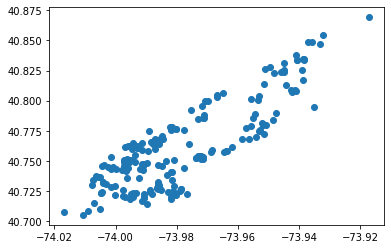

In [36]:
import matplotlib.pyplot as plt
plt.scatter(x=x1['longitude'], y=x1['latitude'])
plt.show()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


(-74.28337047811617, -73.67222994890714, 40.47514452612889, 40.93650364504159)

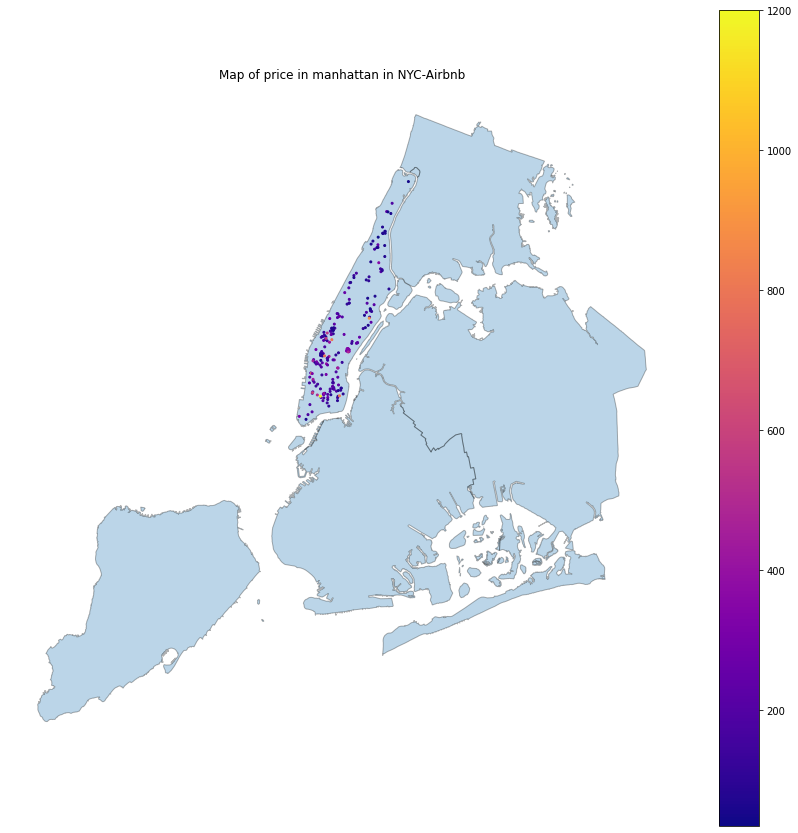

In [74]:
crs = {'init':'epsg:4326'}#  Coordinate Reference System (CRS)
# refrence  https://geopandas.org/projections.html
geometry = geopandas.points_from_xy(x1.longitude, x1.latitude)
geo_data = geopandas.GeoDataFrame(x1,crs=crs,geometry=geometry)
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)
fig,ax = plt.subplots(figsize=(15,15))
nyc.plot(ax=ax,alpha=0.3,edgecolor='black')
geo_data.plot(column='price',ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("Map of price in manhattan in NYC-Airbnb")
plt.axis('off')

In [75]:
x3=df.iloc[np.where(df['commons']=='Manhattan_David')]


In [39]:
x3

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,commons
267,64015,Prime East Village 1 Bedroom,146944,David,Manhattan,East Village,40.72807,-73.98594,Entire home/apt,200,3,0,NaN,NaN,1,0,Manhattan_David
520,189181,Room in Chic Modern High Line Luxury- New!,912541,David,Manhattan,Chelsea,40.74695,-74.00454,Private room,255,4,1,2014-04-20,0.02,1,365,Manhattan_David
990,399946,Light Superhosted Chill LES Apt,1996265,David,Manhattan,Lower East Side,40.72123,-73.98996,Private room,90,10,67,2019-05-16,0.77,1,301,Manhattan_David
1087,456457,West Village Gem - 2BR,1594083,David,Manhattan,West Village,40.73204,-74.00189,Entire home/apt,315,3,7,2016-08-29,0.08,1,0,Manhattan_David
1104,467866,"Our NY home, Greenwich Village apt",2321870,David,Manhattan,West Village,40.73123,-74.00591,Private room,100,2,199,2019-07-05,2.30,1,19,Manhattan_David
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47684,35868549,Brand New 1 Bed in Full Service Building #6125,35098529,David,Manhattan,Kips Bay,40.74410,-73.97683,Entire home/apt,170,30,0,NaN,NaN,5,213,Manhattan_David
47982,36024736,Trendy and Modern Apartment in New York City,221213143,David,Manhattan,Kips Bay,40.74164,-73.98200,Entire home/apt,350,1,0,NaN,NaN,9,337,Manhattan_David
48463,36275809,Cozy 1BR Apartment in Upper East Side New York,272829356,David,Manhattan,Upper East Side,40.77469,-73.95181,Entire home/apt,230,3,0,NaN,NaN,1,350,Manhattan_David
48520,36307890,BEAUTIFUL BEDROOM IN NICE AREA UPTOWN NYC!,139296591,David,Manhattan,Washington Heights,40.83851,-73.94579,Private room,120,3,0,NaN,NaN,1,344,Manhattan_David


In [40]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'commons'],
      dtype='object')

In [41]:
df1=df.copy()

In [77]:
df1=pd.DataFrame({
'hostname':df['host_name'],   
'neighbour':df['neighbourhood'],
 'price':df['price'] ,
 'lon': df['longitude'], 
'lat':df['latitude']
#'neighbourhood_po':df['neighbourhood']
})

In [78]:
df1.head()

,hostname,neighbour,price,lon,lat
0,John,Kensington,149,-73.97237,40.64749
1,Jennifer,Midtown,225,-73.98377,40.75362
2,Elisabeth,Harlem,150,-73.94190,40.80902
3,LisaRoxanne,Clinton Hill,89,-73.95976,40.68514
4,Laura,East Harlem,80,-73.94399,40.79851


In [96]:
top=df1.nlargest(50,'price')
top

,hostname,neighbour,price,lon,lat
9151,Kathrine,Astoria,10000,-73.91651,40.76810
17692,Erin,Greenpoint,10000,-73.95739,40.73260
29238,Jelena,Upper West Side,10000,-73.98665,40.77213
6530,Olson,East Harlem,9999,-73.93898,40.79264
12342,Amy,Lower East Side,9999,-73.98507,40.71355
40433,Matt,Lower East Side,9999,-73.98566,40.71980
30268,Rum,Tribeca,8500,-74.00633,40.72197
4377,Jessica,Clinton Hill,8000,-73.96723,40.69137
29662,Sally,Upper East Side,7703,-73.95989,40.76824
42523,Jack,Battery Park City,7500,-74.01693,40.71162


In [97]:
top['neighbour'].value_counts()

Upper West Side       8
Chelsea               3
Clinton Hill          3
Bedford-Stuyvesant    3
Upper East Side       3
Greenwich Village     3
East Village          2
Lower East Side       2
Tribeca               2
Harlem                2
Battery Park City     2
Greenpoint            1
Bay Ridge             1
Little Italy          1
Gramercy              1
SoHo                  1
Nolita                1
West Village          1
Midtown               1
Williamsburg          1
Prospect Heights      1
Cypress Hills         1
East Harlem           1
Hell's Kitchen        1
Brighton Beach        1
East Flatbush         1
Astoria               1
Randall Manor         1
Name: neighbour, dtype: int64

In [101]:
#Upperwest side has highest rate

## top  price ,Host & neighbours 

In [98]:
top_neigh1=top.iloc[np.where(top['neighbour']=='Upper West Side')]
top_neigh2                                                     

,hostname,neighbour,price,lon,lat
12342,Amy,Lower East Side,9999,-73.98507,40.71355
40433,Matt,Lower East Side,9999,-73.98566,40.71980
8915,Manon,Lower East Side,2000,-73.99099,40.71321


In [99]:
top_neigh2=top.iloc[np.where(top['neighbour']=='Astoria')]
top_neigh2

,hostname,neighbour,price,lon,lat
9151,Kathrine,Astoria,10000,-73.91651,40.7681


In [100]:
top_neigh3=top.iloc[np.where(top['neighbour']=='Lower East Side')]
top_neigh3

,hostname,neighbour,price,lon,lat
12342,Amy,Lower East Side,9999,-73.98507,40.71355
40433,Matt,Lower East Side,9999,-73.98566,40.71980


/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


(-74.28337047811617, -73.67222994890714, 40.47514452612889, 40.93650364504159)

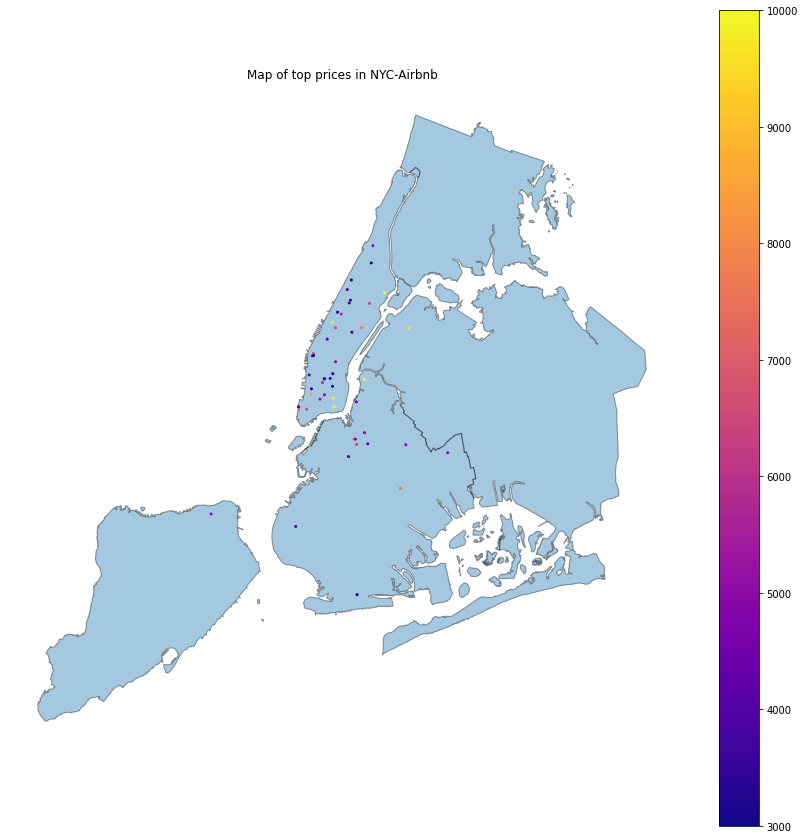

In [102]:
crs = {'init':'epsg:4326'}
geometry = geopandas.points_from_xy(top.lon, top.lat)
geo_data = geopandas.GeoDataFrame(top,crs=crs,geometry=geometry)
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)
fig,ax = plt.subplots(figsize=(15,15))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
geo_data.plot(column='price',ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("Map of top prices in NYC-Airbnb")
plt.axis('off')

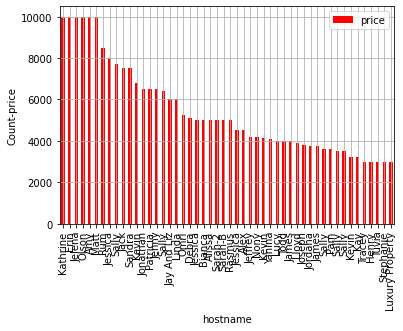

In [103]:
from matplotlib import style
#style.use('ggplot')

top.plot(x='hostname',y='price',kind='bar',linewidth=5,color='R')
plt.ylabel('Count-price')

plt.grid()
plt.show()

## Number of each type of rooms in each Neighbourhood group

In [104]:
df_neighbourhood_1 = df.groupby(['neighbourhood_group','room_type'])
df_neighbourhood_1 = df_neighbourhood_1['id'].count()
df_neighbourhood_1 = df_neighbourhood_1.unstack(level=1)
df_neighbourhood_1

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


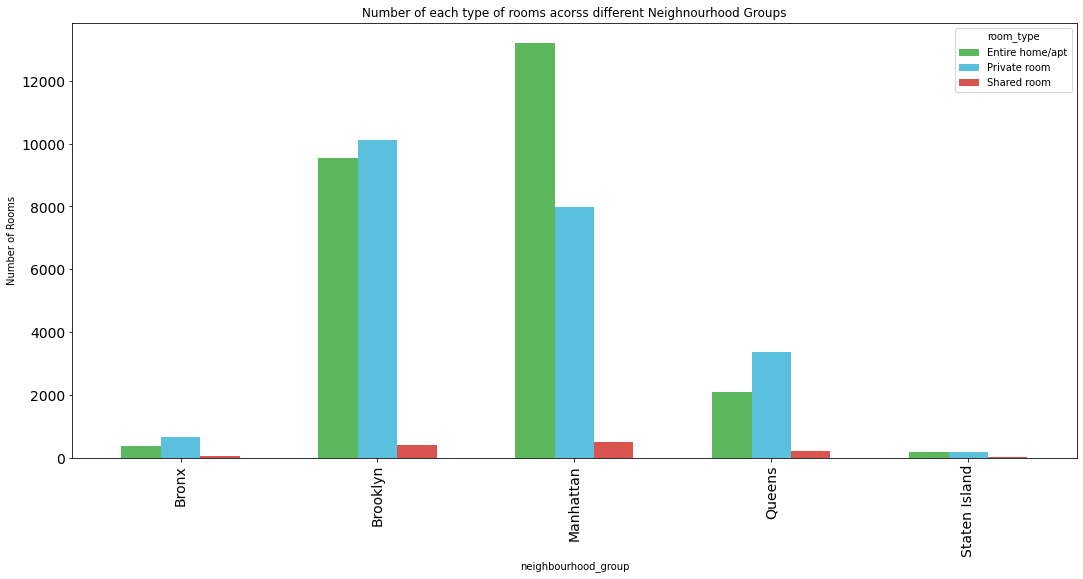

In [105]:
df_neighbourhood_1.plot(kind='bar',
                        figsize=(18,8),
                        width=0.6, 
                        fontsize=14,     
                        color = ['#5cb85c','#5bc0de','#d9534f'],
                        )
plt.title('Number of each type of rooms acorss different Neighnourhood Groups')
plt.ylabel('Number of Rooms')
plt.show()

In [106]:
#### Average price of each type of room in different neighbourhood

In [107]:
df_neighbourhood_2 = df.groupby(['neighbourhood_group','room_type'])
df_neighbourhood_2 = df_neighbourhood_2['price'].mean()
df_neighbourhood_2 = df_neighbourhood_2.unstack(level=1)
df_neighbourhood_2.round(2)

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.51,66.79,59.80
Brooklyn,178.33,76.50,50.53
Manhattan,249.24,116.78,88.98
Queens,147.05,71.76,69.02
Staten Island,173.85,62.29,57.44


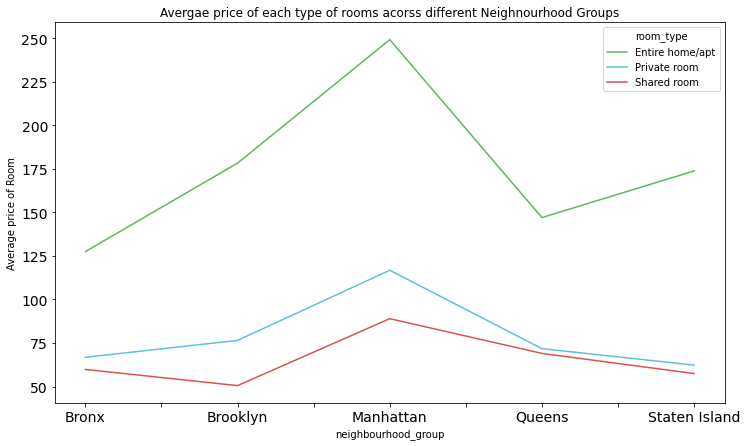

In [108]:
df_neighbourhood_2.plot(kind='line',
                       figsize=(12,7),
                       fontsize=14,
                       color = ['#5cb85c','#5bc0de','#d9534f'])

plt.title('Avergae price of each type of rooms acorss different Neighnourhood Groups')
plt.ylabel('Average price of Room')
plt.show()

In [109]:
df_neighbourhood_3 = df.groupby(['neighbourhood_group','room_type'])
df_neighbourhood_3 = df_neighbourhood_3['price'].max()
df_neighbourhood_3 = df_neighbourhood_3.unstack(level=1)
df_neighbourhood_3

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,1000,2500,800
Brooklyn,10000,7500,725
Manhattan,10000,9999,1000
Queens,2600,10000,1800
Staten Island,5000,300,150


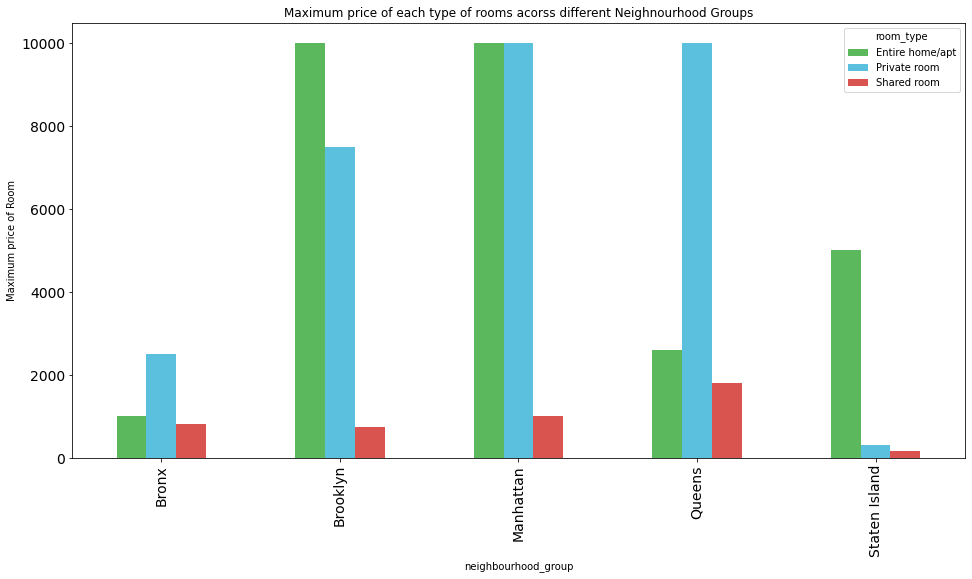

In [110]:
df_neighbourhood_3.plot(kind='bar',
                       figsize=(16,8),
                       fontsize=14,
                       color = ['#5cb85c','#5bc0de','#d9534f'])

plt.title('Maximum price of each type of rooms acorss different Neighnourhood Groups')
plt.ylabel('Maximum price of Room')
plt.show()

In [111]:
!pip install folium

In [112]:
!pip install geopandas

In [113]:
import geopandas

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


(-74.28337047811617, -73.67222994890714, 40.47514452612889, 40.93650364504159)

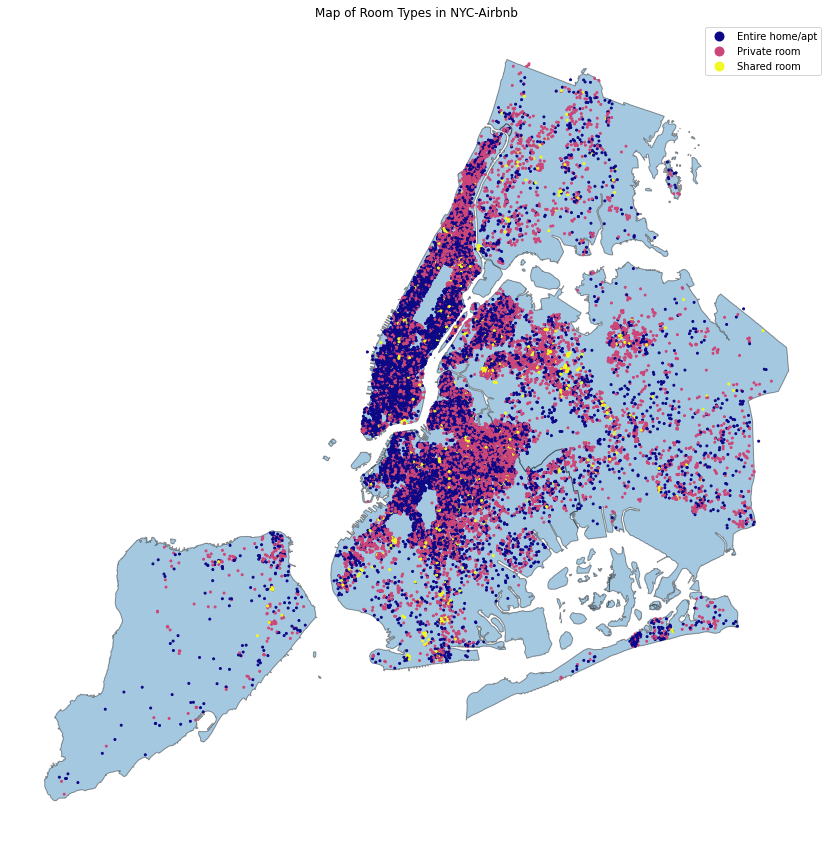

In [114]:
crs = {'init':'epsg:4326'}
geometry = geopandas.points_from_xy(df.longitude, df.latitude)
geo_data = geopandas.GeoDataFrame(df,crs=crs,geometry=geometry)
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)
fig,ax = plt.subplots(figsize=(15,15))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
geo_data.plot(column='room_type',ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("Map of Room Types in NYC-Airbnb")
plt.axis('off')

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


(-74.28337047811617, -73.67222994890714, 40.47514452612889, 40.93650364504159)

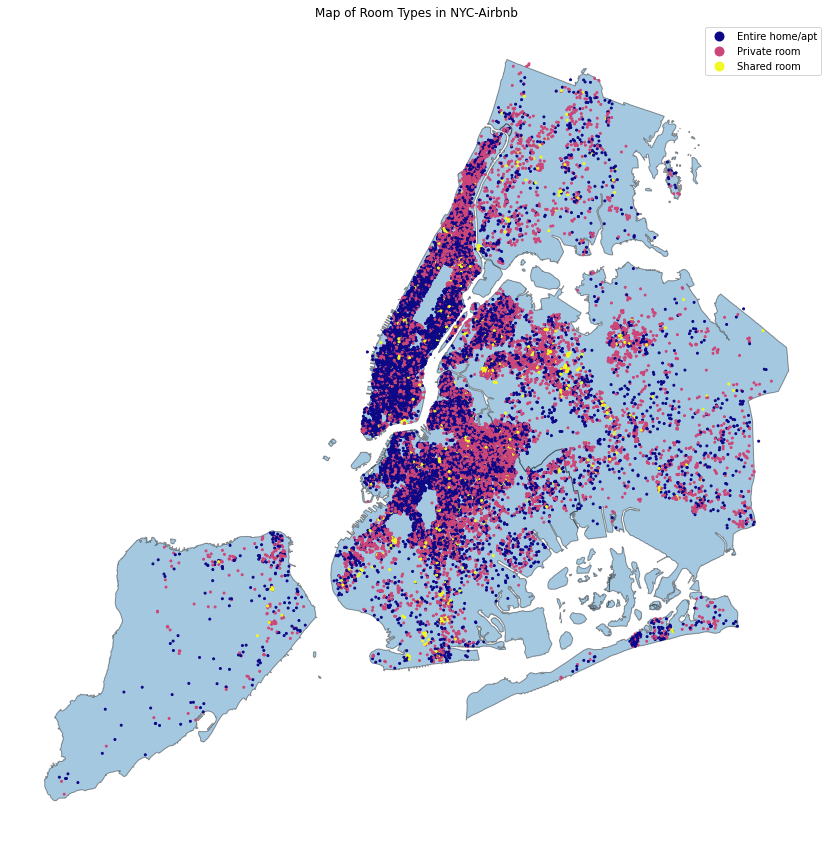

In [115]:
crs = {'init':'epsg:4326'}
geometry = geopandas.points_from_xy(df.longitude, df.latitude)
geo_data = geopandas.GeoDataFrame(df,crs=crs,geometry=geometry)
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)
fig,ax = plt.subplots(figsize=(15,15))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
geo_data.plot(column='room_type',ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("Map of Room Types in NYC-Airbnb")
plt.axis('off')

As it can be seen in this map in Manhattan which is counted as the center of the city the number of renting especially the entire apartment is higher. Also in Brooklyn and Bronx the number of renting private rooms can be highlighted. Overall the number of renting is very low in Staten Island.

# **Airbnb Availability Map**

(-74.28337047811617, -73.67222994890714, 40.47514452612889, 40.93650364504159)

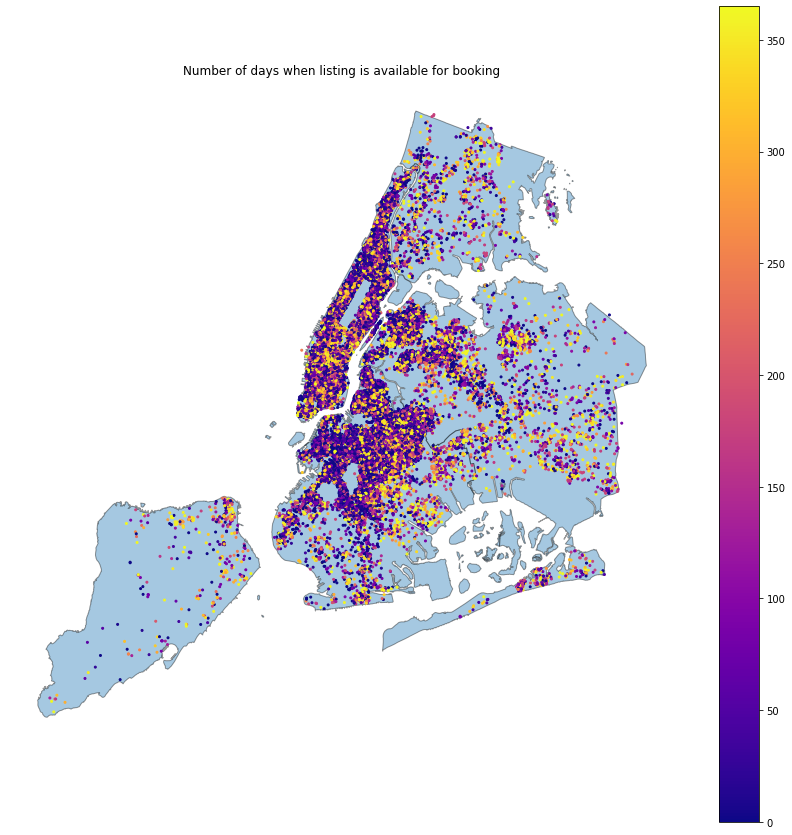

In [117]:
fig,ax = plt.subplots(figsize=(15,15))
nyc.plot(ax=ax,alpha=0.4,edgecolor='black')
geo_data.plot(column="availability_365",ax=ax,legend=True,cmap='plasma',markersize=4)

plt.title("Number of days when listing is available for booking")
plt.axis('off')

In Brooklyn number of days when listing is available for booking is lower than other neighbourhoods which might be due the fact here are more private rooms to rent in that area.